In [2]:
# Study on identifying audio embedded sound.Source is from a Kaggle challenge: https://www.kaggle.com/c/dont-call-me-turkey
# first read the data
import pandas as pd
video=pd.read_json("/home/dogacan/Downloads/train.json")
video.head(3)


,audio_embedding,end_time_seconds_youtube_clip,is_turkey,start_time_seconds_youtube_clip,vid_id
0,"[[172, 34, 216, 110, 208, 46, 95, 66, 161, 125...",70,0,60,kDCk3hLIVXo
1,"[[169, 20, 165, 102, 205, 62, 110, 103, 211, 1...",40,1,30,DPcGzqHoo7Y
2,"[[148, 8, 138, 60, 237, 48, 121, 108, 145, 177...",240,1,230,7yM63MTHh5k




Train data includes audio_embedding of youtube videos and if embedding includes turkey sound. Frames are lists containing (mostly) 128 elements in audio_embedding column. Thus each vid_id has a list of lists (mostly 10 frames) in audio_embedding column. I want to combine frames in lists with each list signifying a vid_id. There are 1195 embeddings. Those which are shorter than 10 frames are repeated until they reach 10 frame data as follows


In [3]:


dicti={}
for i in range(1195):
    liste=[]
    for frame in video.audio_embedding[i]:
        for value in frame:
            liste.append(value)
    dicti[i]=liste
for i in range(1195):
    while len(dicti[i])<1280:
        dicti[i].extend(dicti[i])
    dicti[i]=dicti[i][:1280]  
audio=pd.DataFrame.from_dict(dicti, orient='index')
audio.head(3)



,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,172,34,216,110,208,46,95,66,161,125,...,0,135,133,151,0,3,206,101,104,255
1,169,20,165,102,205,62,110,103,211,187,...,0,0,119,205,27,151,226,44,0,255
2,148,8,138,60,237,48,121,108,145,177,...,0,62,79,204,0,74,243,255,95,255


In [4]:
#now we can create the model using Logistic Regression and check the accuracy of the model which is 93.6%
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
is_turkey=video.is_turkey # target variable
from sklearn.model_selection import cross_val_score
cross_val_score(model, audio, is_turkey, cv=5).mean()  

0.9364082076345183

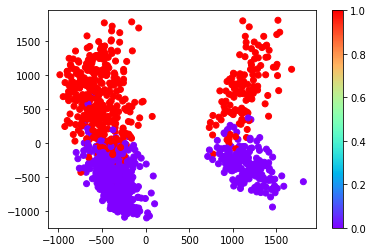

In [10]:


# to visualize the clusters, I project data into 2 dimensions with PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(audio)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(proj[:, 0], proj[:, 1], c=is_turkey,cmap = 'rainbow' ) 
plt.colorbar()

